# Machine Learning Zoomcamp 2025
# Homework 2: Machine Learning for Regression

In [194]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Getting the data

In [4]:
df = pd.read_csv('car_fuel_efficiency.csv')

In [5]:
df.head()


,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


## Preparing the dataset

In [6]:
filtered_df = df[['engine_displacement','horsepower','vehicle_weight','model_year','fuel_efficiency_mpg']]

In [7]:
filtered_df.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369


## EDA

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

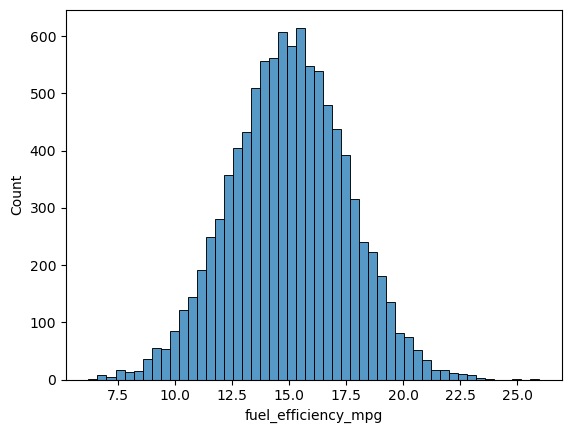

In [195]:
sns.histplot(filtered_df.fuel_efficiency_mpg, bins=50)

### Not a long tail

## Q1.

In [8]:
filtered_df.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

## Q2.

In [10]:
df['horsepower'].describe()

count    8996.000000
mean      149.657292
std        29.879555
min        37.000000
25%       130.000000
50%       149.000000
75%       170.000000
max       271.000000
Name: horsepower, dtype: float64

In [196]:
df['horsepower'].median()

149.0

## Prepare and split the dataset

In [17]:
n = len(filtered_df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [18]:
n

9704

In [19]:
n_val, n_test, n_train

(1940, 1940, 5824)

In [20]:
idx = np.arange(n) 
np.random.seed(42)
np.random.shuffle(idx)

In [21]:
df_train = filtered_df.iloc[idx[:n_train]]
df_val = filtered_df.iloc[idx[n_train:n_train+n_val]]
df_test = filtered_df.iloc[idx[n_train+n_val:]]

In [22]:
len(df_train), len(df_val), len(df_test)

(5824, 1940, 1940)

In [23]:
df_train.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
483,220,144.0,2535.887591,2009,16.642943
7506,160,141.0,2741.170484,2019,16.298377
8795,230,155.0,2471.880237,2017,18.591822
1688,150,206.0,3748.164469,2015,11.818843
6217,300,111.0,2135.716359,2006,19.402209


In [24]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [25]:
df_train.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,220,144.0,2535.887591,2009,16.642943
1,160,141.0,2741.170484,2019,16.298377
2,230,155.0,2471.880237,2017,18.591822
3,150,206.0,3748.164469,2015,11.818843
4,300,111.0,2135.716359,2006,19.402209


In [110]:
def prepare_data(df, seed = 42):
    n = len(df)

    n_val = int(n * 0.2)
    n_test = int(n * 0.2)
    n_train = n - n_val - n_test

    idx = np.arange(n) 
    np.random.seed(seed)
    np.random.shuffle(idx)

    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train+n_val]]
    df_test = df.iloc[idx[n_train+n_val:]]

    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)

    return df_train, df_val, df_test

## Q3.

In [26]:
df['horsepower'].mean()

np.float64(149.65729212983547)

In [59]:
df1 = filtered_df.copy()
df1.fillna({'horsepower':0}, inplace=True)

In [60]:
df1.value_counts('horsepower')

horsepower
0.0      708
152.0    142
145.0    141
151.0    134
141.0    130
        ... 
66.0       1
61.0       1
59.0       1
57.0       1
271.0      1
Name: count, Length: 193, dtype: int64

In [37]:
filtered_df['horsepower'].mean()

np.float64(149.65729212983547)

In [39]:
df2 = filtered_df.copy()
df2.fillna({'horsepower':df2['horsepower'].mean()}, inplace=True)

In [40]:
df2.value_counts('horsepower')

horsepower
149.657292    708
152.000000    142
145.000000    141
151.000000    134
141.000000    130
             ... 
55.000000       1
53.000000       1
46.000000       1
43.000000       1
271.000000      1
Name: count, Length: 193, dtype: int64

In [43]:
df1.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.000000,3413.433759,2003,13.231729
1,130,97.000000,3149.664934,2007,13.688217
2,170,78.000000,3079.038997,2018,14.246341
3,220,149.657292,2542.392402,2009,16.912736
4,210,140.000000,3460.870990,2009,12.488369


In [69]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [160]:
def linear_regression(df, features, label, seed = 42):
    df_train, df_val, df_test = prepare_data(df, seed)
    X_train = df_train[features]
    y_train = df_train[label]
    ones = np.ones(X_train.shape[0])
    X_train = np.column_stack([ones, X_train])
    XTX = X_train.T.dot(X_train)
    XTX_inv = np.linalg.inv(XTX) 
    w_full = XTX_inv.dot(X_train.T).dot(y_train)
    w0 = w_full[0]
    w = w_full[1:]
    X_val = df_val[features]
    y_val = df_val[label]
    y_pred = w0 + X_val.dot(w)
    return rmse(y_val, y_pred)
    

In [138]:
features = ['engine_displacement','horsepower','vehicle_weight','model_year']
label = 'fuel_efficiency_mpg'

In [162]:
score = linear_regression(df1, features, label) # With 0
round(score, 2)

np.float64(0.52)

In [163]:
score = linear_regression(df2, features, label) # With mean
round(score, 2)

np.float64(0.46)

### Filling missing values with mean gives better value than filling missing values with 0


## Q4.

In [189]:
def linear_regression_reg(df, features, label, r, seed = 42):
    df_train, df_val, df_test = prepare_data(df, seed)
    X_train = df_train[features]
    y_train = df_train[label].values
    ones = np.ones(X_train.shape[0])
    X_train = np.column_stack([ones, X_train])

    XTX = X_train.T.dot(X_train)
    XTX = XTX + r * np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X_train.T).dot(y_train)
    w0 = w_full[0]
    w = w_full[1:]
    X_val = df_val[features].values 
    y_val = df_val[label].values
    y_pred = w0 + X_val.dot(w)
    return rmse(y_val, y_pred)
    

In [190]:
r_values = [0, 0.01, 0.1, 1, 5, 10, 100]

In [198]:
for r in r_values:
    score = linear_regression_reg(df1, features, label, r)
    print(f"r={r}, rmse = {round(score, 2)}")

r=0, rmse = 0.52
r=0.01, rmse = 0.52
r=0.1, rmse = 0.52
r=1, rmse = 0.52
r=5, rmse = 0.52
r=10, rmse = 0.52
r=100, rmse = 0.52


### rmse = 0.52 for all given values of r

## Q5.

In [168]:
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [173]:
rmses= []
for seed in seeds:
    rmses.append(linear_regression(df1, features, label, seed))

In [175]:
rmses = np.array(rmses)
rmses

array([0.52065313, 0.52133889, 0.522807  , 0.51595167, 0.51091295,
       0.52834065, 0.53139107, 0.50906704, 0.51473991, 0.51318659])

In [176]:
std = np.std(rmses)

In [177]:
round(std,3)

np.float64(0.007)

### Q6.

In [182]:
def linear_regression_test(df, features, label, r, seed = 42):
    df_train, df_val, df_test = prepare_data(df, seed)
    df_full_train = pd.concat([df_train, df_val])
    df_full_train = df_full_train.reset_index(drop=True)
    X_full_train = df_full_train[features]
    y_full_train = df_full_train[label]
    ones = np.ones(X_full_train.shape[0])
    X_full_train = np.column_stack([ones, X_full_train])

    XTX = X_full_train.T.dot(X_full_train)
    XTX = XTX + r * np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X_full_train.T).dot(y_full_train)
    w0 = w_full[0]
    w = w_full[1:]
    X_test = df_test[features]
    y_test = df_test[label]
    y_pred = w0 + X_test.dot(w)
    return rmse(y_test, y_pred)
    

In [201]:
linear_regression_test(df1, features, label, r=0.001,seed = 9)

np.float64(0.5156261299202409)